# Prediction using Decision Tree Algorithm

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

import graphviz
from sklearn.tree import export_graphviz

In [46]:
data = pd.read_csv('/Users/pranjali_yadav/Desktop/GRIP/IrisDT.csv')
data.head(20)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [47]:
data.shape

(150, 6)

In [48]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [50]:
label_encoder = LabelEncoder()
data['Species'] = label_encoder.fit_transform(data['Species'])

In [51]:
x = data.drop(columns=['Id', 'Species'])  #feature
y = data['Species'] #target variable

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [54]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((105, 4), (45, 4), (105,), (45,))

In [38]:
clf = DecisionTreeClassifier()

clf.fit(x_train, y_train)


DecisionTreeClassifier()

In [39]:
y_pred = clf.predict(x_test)

In [55]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
73,1,1
18,0,0
118,2,2
78,1,1
76,1,1
31,0,0
64,1,1
141,2,2
68,1,1
82,1,1


In [40]:
#evaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')
print(f'Confusion Matrix:\n{conf_matrix}')

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


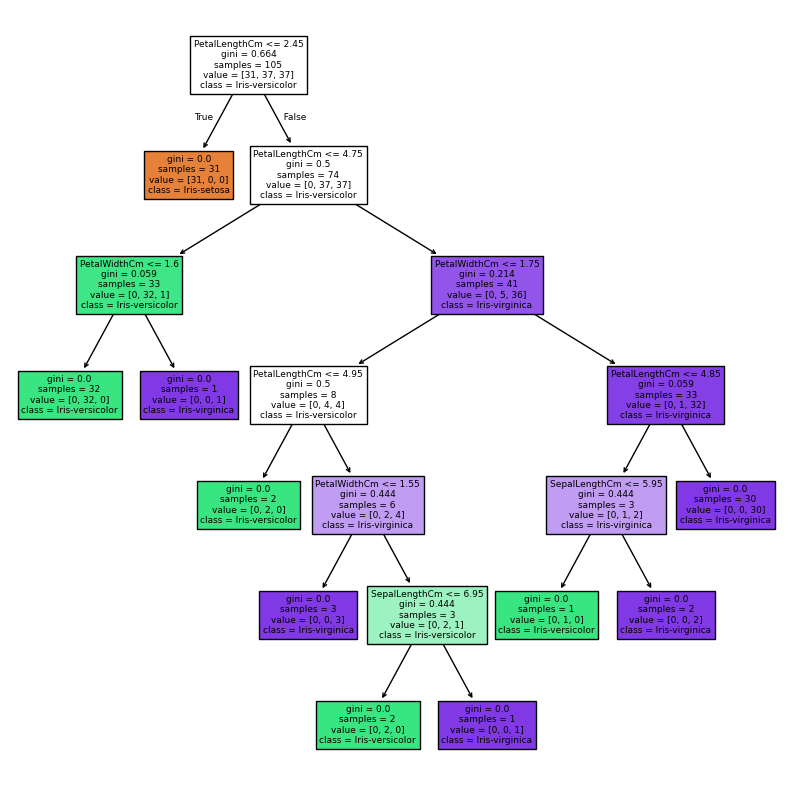

In [41]:
plt.figure(figsize=(10, 10))
plot_tree(clf, feature_names=x.columns, class_names=label_encoder.classes_, filled=True)
plt.show()

one more way to make graphs

In [42]:
# Convert class names to strings
class_names = list(map(str, label_encoder.classes_))

# Export the decision tree to a Graphviz file
dot_data = export_graphviz(
    clf,
    out_file=None,
    feature_names=x.columns,
    class_names=class_names,
    filled=True,
    rounded=True,
    special_characters=True,
)

graph = graphviz.Source(dot_data)
graph.render("iris_decision_tree") 
#graph.view("iris_decision_tree")    


'iris_decision_tree.pdf'